In [4]:
!pip install -qU langgraph==0.2.14 langchain==0.2.14 langchain_openai==0.1.23 langchain_core==0.2.35 langchain-community==0.2.12

In [5]:
import os
import openai
from getpass import getpass

openai.api_key = getpass("Please provide your OpenAI Key: ")
os.environ["OPENAI_API_KEY"] = openai.api_key

In [6]:
# Reload the documents for testing purposes
from langchain.document_loaders import PyPDFLoader
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_community.vectorstores import Qdrant
from langchain_openai import OpenAIEmbeddings

# Load the PDFs
test_loader1 = PyPDFLoader("/Users/joenoss/Downloads/Blueprint-for-an-AI-Bill-of-Rights.pdf")
test_loader2 = PyPDFLoader("/Users/joenoss/Downloads/NIST.AI.600-1.pdf")
test_pages1 = test_loader1.load_and_split()
test_pages2 = test_loader2.load_and_split()

test_all_pages = test_pages1 + test_pages2


In [7]:

test_all_pages = test_pages1 + test_pages2

In [8]:
from langchain_qdrant import QdrantVectorStore
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

doc_store = QdrantVectorStore.from_documents(
    test_all_pages,
    embeddings,
    location=":memory:",  # Using in-memory storage for this example
    collection_name="midterm_docs"
)

# Perform a similarity search
query = "What are the key principles of the AI Bill of Rights?"
found_docs = doc_store.similarity_search(query)

# Print the content of the first found document
print(found_docs[0].page_content)

ABOUT THIS  FRAMEWORK
The Blueprint for an AI Bill of Rights is a set of five principles and associated practices to help guide the 
design, use, and deployment of automated systems to protect the rights of the American public in the age of 
artificial intel-ligence. Developed through extensive consultation with the American public, these principles are 
a blueprint for building and deploying automated systems that are aligned with democratic values and protect 
civil rights, civil liberties, and privacy. The Blueprint for an AI Bill of Rights includes this Foreword, the five 
principles, notes on Applying the The Blueprint for an AI Bill of Rights, and a Technical Companion that gives 
concrete steps that can be taken by many kinds of organizations—from governments at all levels to companies of 
all sizes—to uphold these values. Experts from across the private sector, governments, and international 
consortia have published principles and frameworks to guide the responsible use of aut

In [9]:
!pip install -U sentence-transformers

In [13]:
from huggingface_hub import notebook_login

notebook_login()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [11]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("JoeNoss1998/Noss")

In [14]:
embeddings = HuggingFaceEmbeddings(model_name="JoeNoss1998/Noss")

# Create Qdrant vector store with your custom embeddings
doc_store = QdrantVectorStore.from_documents(
    test_all_pages,
    embeddings,
    location=":memory:",  # Using in-memory storage for this example
    collection_name="midterm_docs_custom"
)

# Perform a similarity search
query = "What are the key principles of the AI Bill of Rights?"
found_docs = doc_store.similarity_search(query)

# Print the content of the first found document
print(found_docs[0].page_content)

In [15]:
import pandas as pd

test_df = pd.read_csv("testset.csv")

In [16]:
test_df

,Unnamed: 0,question,contexts,ground_truth,evolution_type,metadata,episode_done
0,0,What are some examples of data brokers exposin...,"[""65. See, e.g., Scott Ikeda. Major Data Broke...",Some examples of data brokers exposing social ...,simple,[{'source': '/Users/joenoss/Downloads/Blueprin...,True
1,1,How are unanticipated impacts of GAI systems i...,['28 MAP 5.2: Practices and personnel for sup...,Unanticipated impacts of GAI systems are ident...,simple,[{'source': '/Users/joenoss/Downloads/NIST.AI....,True
2,2,What is the purpose of implementing regular ad...,"['25 MP-2.3-002 Review and document accuracy, ...",Implementing regular adversarial testing for G...,simple,[{'source': '/Users/joenoss/Downloads/NIST.AI....,True
3,3,How should equity standards be monitored and a...,"[""-\ntion when deployed. This assessment shoul...",Equity standards in systems should be monitore...,simple,[{'source': '/Users/joenoss/Downloads/Blueprin...,True
4,4,How can appropriate diligence on training data...,"[""27 MP-4.1-0 10 Conduct appropriate diligence...",Appropriate diligence on training data use can...,simple,[{'source': '/Users/joenoss/Downloads/NIST.AI....,True
5,5,Why is a glossary important for transparency i...,['57 National Institute of Standards and Techn...,A glossary is important for transparency in sy...,multi_context,[{'source': '/Users/joenoss/Downloads/NIST.AI....,True
6,6,How do AI systems and tech affect equity in se...,"[""APPENDIX\nPanel 3: Equal Opportunities and C...",AI systems and other technologies are increasi...,multi_context,[{'source': '/Users/joenoss/Downloads/Blueprin...,True
7,7,What criteria should automated systems meet fo...,"[""NOTICE & \nEXPLANATION \nWHAT SHOULD BE EXPE...",The answer to given question is not present in...,multi_context,[{'source': '/Users/joenoss/Downloads/Blueprin...,True
8,8,How can organizations reduce GAI risks through...,['14 GOVERN 1.2: The characteristics of trust...,Organizations can reduce GAI risks through tra...,multi_context,[{'source': '/Users/joenoss/Downloads/NIST.AI....,True
9,9,How can organizations address GAI incidents to...,['46 MG-4.3-003 Report GAI incidents in compli...,Organizations can address GAI incidents to com...,reasoning,[{'source': '/Users/joenoss/Downloads/NIST.AI....,True


In [17]:
from langchain_qdrant import QdrantVectorStore
from langchain_core.vectorstores import VectorStoreRetriever
from langchain_qdrant import RetrievalMode

# Assuming doc_store is your existing QdrantVectorStore
retriever = doc_store.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 4},  # Retrieve top 4 most similar documents
    retrieval_mode=RetrievalMode.DENSE  # Explicitly set to dense retrieval
)

# Test the retriever
query = "Who is the president?"
retrieved_docs = retriever.get_relevant_documents(query)

# Print the content of the first retrieved document
print(retrieved_docs[0].page_content)

/opt/anaconda3/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


In [18]:
from langchain.prompts import ChatPromptTemplate

template = """Answer the question based only on the following context. If you cannot answer the question with the context, please respond with 'I don't know':

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

In [19]:
from operator import itemgetter
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate
# Initialize the ChatOpenAI model
primary_qa_llm = ChatOpenAI(model_name="gpt-4o", temperature=0)  # Changed to "gpt-4" as "gpt-4o-mini" is not a standard model name
retrieval_augmented_qa_chain = (
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    | RunnablePassthrough.assign(
        context_str=lambda x: "\n\n".join([doc.page_content for doc in x["context"]])
    )
    | {
        "response": (lambda x: {"context": x["context_str"], "question": x["question"]}) | prompt | primary_qa_llm | StrOutputParser(),
        "context": itemgetter("context")
    }
)

In [20]:
# Test the chain
question = "What is a policy around AI in these documents?"
result = retrieval_augmented_qa_chain.invoke({"question": question})
print(result["response"])

In [21]:
test_questions = test_df["question"].values.tolist()
test_groundtruths = test_df["ground_truth"].values.tolist()

In [ ]:
print(test_questions)
print(test_groundtruths)

In [ ]:
!pip install ragas

In [29]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context
from langchain_openai import ChatOpenAI, OpenAIEmbeddings


answers = []
contexts = []

for question in test_questions:
    response = retrieval_augmented_qa_chain.invoke({"question": question})
    answers.append(response["response"])
    contexts.append([doc.page_content for doc in response["context"]])

In [30]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [31]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [32]:
results = evaluate(response_dataset, metrics)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

In [33]:
results_df = results.to_pandas()
results_df

,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,context_recall,context_precision,answer_correctness
0,What are some examples of data brokers exposin...,"[65. See, e.g., Scott Ikeda. Major Data Broker...",A data broker harvested large amounts of perso...,Some examples of data brokers exposing social ...,1.0,0.871373,1.0,1.000000,0.223723
1,How are unanticipated impacts of GAI systems i...,[28 MAP 5.2: Practices and personnel for supp...,Unanticipated impacts of GAI systems are ident...,Unanticipated impacts of GAI systems are ident...,1.0,0.956561,1.0,1.000000,0.675578
2,What is the purpose of implementing regular ad...,[49 early lifecycle TEVV approaches are develo...,I don't know.,Implementing regular adversarial testing for G...,0.0,0.000000,1.0,1.000000,0.182131
3,How should equity standards be monitored and a...,[-\ntion when deployed. This assessment should...,Equity standards in systems should be monitore...,Equity standards in systems should be monitore...,1.0,0.948780,1.0,1.000000,0.601324
4,How can appropriate diligence on training data...,[27 MP-4.1-0 10 Conduct appropriate diligence ...,Appropriate diligence on training data use can...,Appropriate diligence on training data use can...,1.0,1.000000,1.0,1.000000,0.562360
5,Why is a glossary important for transparency i...,[characteristics of trustworthiness including ...,I don't know.,A glossary is important for transparency in sy...,0.0,0.000000,1.0,0.416667,0.176466
6,How do AI systems and tech affect equity in se...,[APPENDIX\nPanelists discussed the benefits of...,AI systems and technologies are increasingly b...,AI systems and other technologies are increasi...,1.0,0.884492,1.0,1.000000,0.927569
7,What criteria should automated systems meet fo...,[NOTICE & \nEXPLANATION \nWHAT SHOULD BE EXPEC...,Automated systems should meet the following cr...,The answer to given question is not present in...,1.0,0.963570,1.0,0.250000,0.180438
8,How can organizations reduce GAI risks through...,[14 GOVERN 1.2: The characteristics of trustw...,Organizations can reduce GAI risks through tra...,Organizations can reduce GAI risks through tra...,1.0,0.953258,1.0,1.000000,0.990262
9,How can organizations address GAI incidents to...,[46 MG-4.3-003 Report GAI incidents in complia...,Organizations can address GAI incidents to com...,Organizations can address GAI incidents to com...,0.9,0.947516,1.0,1.000000,0.449963


In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain_qdrant import QdrantVectorStore
from langchain_core.vectorstores import VectorStoreRetriever
from langchain_qdrant import RetrievalMode
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from operator import itemgetter

# Create OpenAI embeddings
openai_embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# Create a new Qdrant vector store with OpenAI embeddings
openai_doc_store = QdrantVectorStore.from_documents(
    test_all_pages,
    openai_embeddings,
    location=":memory:",
    collection_name="midterm_docs_openai"
)


In [ ]:
openai_retriever = openai_doc_store.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 4},
    retrieval_mode=RetrievalMode.DENSE
)


In [ ]:
primary_qa_llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# Create the OpenAI-based retrieval augmented QA chain
openai_retrieval_augmented_qa_chain = (
    {"context": itemgetter("question") | openai_retriever, "question": itemgetter("question")}
    | RunnablePassthrough.assign(
        context_str=lambda x: "\n\n".join([doc.page_content for doc in x["context"]])
    )
    | {
        "response": (lambda x: {"context": x["context_str"], "question": x["question"]}) | prompt | primary_qa_llm | StrOutputParser(),
        "context": itemgetter("context")
    }
)

In [ ]:
test_question = "What is an example policy on AI?"
openai_result = openai_retrieval_augmented_qa_chain.invoke({"question": test_question})
print("OpenAI Embedding Result:")
print(openai_result["response"])

# Compare with your custom model result
custom_result = retrieval_augmented_qa_chain.invoke({"question": test_question})
print("\nCustom Embedding Result:")
print(custom_result["response"])

In [ ]:
# First, let's generate answers and contexts using the OpenAI model
openai_answers = []
openai_contexts = []

for question in test_questions:
    response = openai_retrieval_augmented_qa_chain.invoke({"question": question})
    openai_answers.append(response["response"])
    openai_contexts.append([doc.page_content for doc in response["context"]])


In [ ]:
from datasets import Dataset

openai_response_dataset = Dataset.from_dict({
    "question": test_questions,
    "answer": openai_answers,
    "contexts": openai_contexts,
    "ground_truth": test_groundtruths
})

# Run RAGAS evaluation on the OpenAI model
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [ ]:

openai_results = evaluate(openai_response_dataset, metrics)

# Convert results to a pandas DataFrame for easy viewing
openai_results_df = openai_results.to_pandas()

In [ ]:
print(openai_results_df)

In [ ]:
# Calculate the average of each metric
average_scores = results_df[['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision', 'answer_correctness']].mean()

# Create a DataFrame with the average scores
average_scores_df = pd.DataFrame(average_scores).T  # Transpose to get a single row

# Rename the index
average_scores_df.index = ['Average Scores']

# Display the average scores
print(average_scores_df)

# If you want to round the values to a certain number of decimal places, e.g., 4:
print("\nRounded to 4 decimal places:")
print(average_scores_df.round(4))

In [ ]:
# Calculate averages for OpenAI model
openai_average_scores = openai_results_df[['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision', 'answer_correctness']].mean()

# Create a DataFrame with the OpenAI average scores
openai_average_scores_df = pd.DataFrame(openai_average_scores).T
openai_average_scores_df.index = ['OpenAI Average Scores']

# Combine both average scores
combined_averages = pd.concat([average_scores_df, openai_average_scores_df])

# Display the combined averages
print("Combined Average Scores:")
print(combined_averages.round(4))

# Calculate the difference (Custom - OpenAI)
difference = average_scores_df.values - openai_average_scores_df.values
difference_df = pd.DataFrame(difference, index=['Difference (Custom - OpenAI)'], columns=average_scores_df.columns)

# Add the difference to the combined averages
final_comparison = pd.concat([combined_averages, difference_df])

print("\nFinal Comparison (including difference):")
print(final_comparison.round(4))

In [ ]:
import pandas as pd

# Assuming we have already calculated the average scores for both models
# If not, let's do that first:

custom_avg_scores = results_df[['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision', 'answer_correctness']].mean()
openai_avg_scores = openai_results_df[['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision', 'answer_correctness']].mean()

# Create a DataFrame with both sets of scores
comparison_df = pd.DataFrame({
    'Custom Model': custom_avg_scores,
    'OpenAI Model': openai_avg_scores
})

# Calculate the difference (Custom - OpenAI)
comparison_df['Difference'] = comparison_df['Custom Model'] - comparison_df['OpenAI Model']

# Round the values to 4 decimal places
comparison_df = comparison_df.round(4)

# Sort by the absolute difference to see the metrics with the biggest gaps
comparison_df = comparison_df.reindex(comparison_df['Difference'].abs().sort_values(ascending=False).index)

# Display the comparison table
print("Model Comparison:")
print(comparison_df.to_string())

# If you want a more visually appealing table in a Jupyter notebook, you can use:
from IPython.display import display, HTML
display(HTML(comparison_df.to_html(classes='table table-striped table-hover')))

# Optionally, create a bar plot to visualize the comparison
import matplotlib.pyplot as plt

comparison_df[['Custom Model', 'OpenAI Model']].plot(kind='bar', figsize=(12, 6))
plt.title('Custom Model vs OpenAI Model - Average Scores Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(loc='best')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_community.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer
from langchain_qdrant import QdrantVectorStore
from langchain_core.vectorstores import VectorStoreRetriever
from langchain_qdrant import RetrievalMode
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from operator import itemgetter

# Load your custom model
model = SentenceTransformer("JoeNoss1998/Noss")
custom_embeddings = HuggingFaceEmbeddings(model_name="JoeNoss1998/Noss")


In [34]:

# Create a semantic chunker with your custom embeddings
semantic_chunker = SemanticChunker(custom_embeddings)

# Split your documents using semantic chunking
semantic_chunks = semantic_chunker.split_documents(test_all_pages)


In [35]:
semantic_doc_store = QdrantVectorStore.from_documents(
    semantic_chunks,
    custom_embeddings,
    location=":memory:",
    collection_name="midterm_docs_semantic_custom"
)



In [36]:
# Create a retriever from the semantic vector store
semantic_retriever = semantic_doc_store.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 4},
    retrieval_mode=RetrievalMode.DENSE
)

# Create the semantic retrieval augmented QA chain
semantic_retrieval_augmented_qa_chain = (
    {"context": itemgetter("question") | semantic_retriever, "question": itemgetter("question")}
    | RunnablePassthrough.assign(
        context_str=lambda x: "\n\n".join([doc.page_content for doc in x["context"]])
    )
    | {
        "response": (lambda x: {"context": x["context_str"], "question": x["question"]}) | prompt | primary_qa_llm | StrOutputParser(),
        "context": itemgetter("context")
    }
)


In [37]:
semantic_answers = []
semantic_contexts = []

for question in test_questions:
    response = semantic_retrieval_augmented_qa_chain.invoke({"question": question})
    semantic_answers.append(response["response"])
    semantic_contexts.append([doc.page_content for doc in response["context"]])



In [38]:
# Create a dataset for the semantic model with custom embeddings
semantic_response_dataset = Dataset.from_dict({
    "question": test_questions,
    "answer": semantic_answers,
    "contexts": semantic_contexts,
    "ground_truth": test_groundtruths
})

In [39]:
semantic_results = evaluate(semantic_response_dataset, metrics)

# Convert results to a pandas DataFrame
semantic_results_df = semantic_results.to_pandas()

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

,Custom Model,Semantic Custom Model,Difference
answer_relevancy,0.7526,0.8579,-0.1054
faithfulness,0.7900,0.8857,-0.0957
answer_correctness,0.4970,0.5817,-0.0848
context_recall,1.0000,0.9167,0.0833
context_precision,0.8667,0.8667,-0.0000


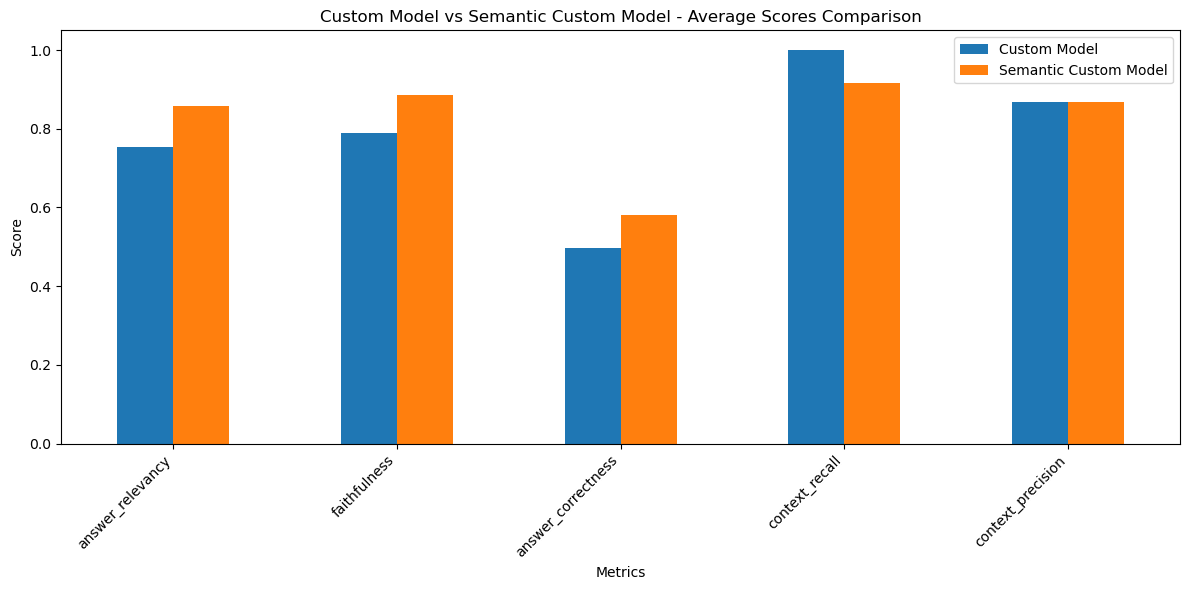

In [41]:
# Calculate average scores for both models
custom_avg_scores = results_df[['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision', 'answer_correctness']].mean()
semantic_avg_scores = semantic_results_df[['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision', 'answer_correctness']].mean()

# Create a DataFrame with both sets of scores
comparison_df = pd.DataFrame({
    'Custom Model': custom_avg_scores,
    'Semantic Custom Model': semantic_avg_scores
})

# Calculate the difference (Custom - Semantic Custom)
comparison_df['Difference'] = comparison_df['Custom Model'] - comparison_df['Semantic Custom Model']

# Round the values to 4 decimal places
comparison_df = comparison_df.round(4)

# Sort by the absolute difference to see the metrics with the biggest gaps
comparison_df = comparison_df.reindex(comparison_df['Difference'].abs().sort_values(ascending=False).index)

# Display the comparison table
print("Model Comparison:")
print(comparison_df.to_string())

# If you want a more visually appealing table in a Jupyter notebook, you can use:
from IPython.display import display, HTML
display(HTML(comparison_df.to_html(classes='table table-striped table-hover')))

# Create a bar plot to visualize the comparison
import matplotlib.pyplot as plt

comparison_df[['Custom Model', 'Semantic Custom Model']].plot(kind='bar', figsize=(12, 6))
plt.title('Custom Model vs Semantic Custom Model - Average Scores Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(loc='best')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()